# <center> Проект. Статистические тесты для HR-агенства

<center> <img src = 'https://avatars.mds.yandex.net/i?id=ac96a2dd616b6103e1e2baaa77c0b477b414b166-5177089-images-thumbs&n=13'>

## Постановка задачи

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

В ходе анализа необходимо:

1. Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.
2. Ответить на ключевые вопросы HR-агентства:
   * а. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
   * б. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
   * в. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
   * г. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

Если в данных найдутся интересные закономерности, необходимо их отметить.

На каждый вопрос необходимо ответить с уровнем значимости $\alpha=0.05$.

Данные были получены. Они содержат следующую информацию:

work_year - Год, в котором была выплачена зарплата.

experience_level - Опыт работы на этой должности в течение года со следующими возможными значениями:
   * EN — Entry-level/Junior;
   * MI — Mid-level/Intermediate;
   * SE — Senior-level/Expert;
   * EX — Executive-level/Director.

employment_type	 - Тип трудоустройства для этой роли:
   * PT — неполный рабочий день;
   * FT — полный рабочий день;
   * CT — контракт;
   * FL — фриланс.

job_title - Роль, в которой соискатель работал в течение года.

salary - Общая выплаченная валовая сумма заработной платы.

salary_currency - Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.

salary_in_usd - Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).

employee_residence - Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.

remote_ratio - Общий объём работы, выполняемой удалённо. Возможные значения:
   * 0 — удалённой работы нет (менее 20 %);
   * 50 — частично удалённая работа;
   * 100 — полностью удалённая работа (более 80 %).

company_location - Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.

company_size - Среднее количество людей, работавших в компании в течение года:
   * S — менее 50 сотрудников (небольшая компания);
   * M — от 50 до 250 сотрудников (средняя компания);
   * L — более 250 сотрудников (крупная компания).

## Загрузка данных

In [54]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
ds_salaries = pd.read_csv('F:\IDE\SkillFactory\EDA-4_Статистические тесты\ds_salaries.csv')
ds_salaries

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


## Типы признаков

work_year - категориальный порядковый,

experience_level - категориальный порядковый,

employment_type - категориальный номинальный,

job_title - категориальный номинальный,

salary - количественный,

salary_currency - категориальный номинальный,

salary_in_usd - количественный,

employee_residence - категориальный номинальный,

remote_ratio - категориальный порядковый,

company_location - категориальный номинальный,

company_size - категориальный порядковый.

## Описательный анализ данных

In [56]:
# Проверим данные на наличие пропусков:
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [57]:
# Проверим данные на наличие дубликатов:
print(f'Количество дубликатов: {ds_salaries[ds_salaries.duplicated()].shape[0]}')

Количество дубликатов: 0


В данных нет ни пропусков, ни дубликатов.

### Распределение зарплаты

Поскольку главный предмет нашего анализа - это зарплата, посмотрим на её распределение. Однако сразу бросается в глаза, что признак "salary" мы не можем анализировать, потому что он выражен в разных валютах. Для анализа важен лишь признак "salary_in_usd", так как в нём валюта универсальна. Значения именно этого признака мы и будем анализировать. Таким образом, признаки "salary" и "salary_currency" не представляют никакой значимости. Их можно удалить из исходных данных. Также удалим столбец Unnamed: 0. Он не несёт никакой смысловой нагрузки и просто дублирует id.

In [58]:
# Удаляем столбцы 'salary' и 'salary_currency':
ds_salaries = ds_salaries.drop(['salary', 'salary_currency', 'Unnamed: 0'], axis=1)
ds_salaries

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


Теперь можно анализировать распределение заработной платы.

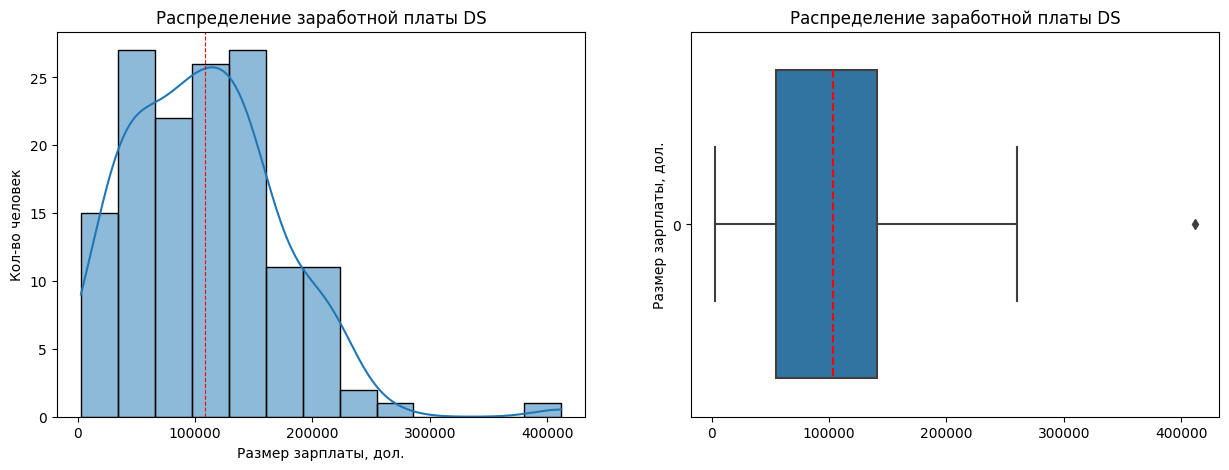

In [59]:
salaries_DS = ds_salaries.loc[ds_salaries['job_title'] == 'Data Scientist']

# Готовим плоскости для двух графиков с распределением зарплаты дата-сайентистов:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# На первой плоскости - гистограмма:
sns.histplot(salaries_DS['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер зарплаты, дол.', ylabel='Кол-во человек')
axes[0].set_title('Распределение заработной платы DS')
# Добавим линию, отображающую среднюю:
axes[0].axvline(salaries_DS['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

# На второй плоскости - коробчатая диаграмма с линией, обозначающей медиану:
sns.boxplot(salaries_DS['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Размер зарплаты, дол.')
axes[1].set_title('Распределение заработной платы DS')

plt.show()

Внешне график распределения заработной платы указывает на ненормальное распределение данных. C другой стороны, средняя и медиана (красные пунктирные линии на столбчатой и коробчатой диаграммах соответственно) практически совпадают. Гипотеза о ненормальности распределения требует строгого математического подтверждения.

Выясним, наблюдается ли ежегодный рост зарплаты у дата-сайентистов. Спрогнозируем ответ на этот вопрос при помощи графиков. Построим два графика: изменение средней зарплаты и - поскольку распредление зарплаты похоже на ненормальное - изменение медианной зарплаты.

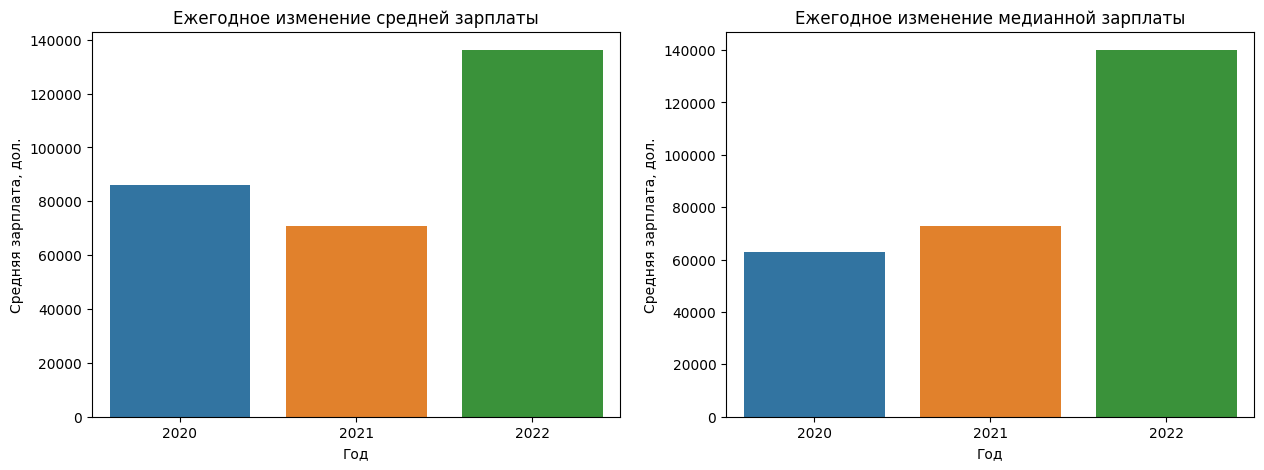

In [60]:
# Группируем данные по году. В качестве значений возьмём средние:
mean_salary = salaries_DS.groupby(
    by = ('work_year'),
    as_index = False
    )[['salary_in_usd']].mean()

# То же самое для медианной зарплаты:
median_salary = salaries_DS.groupby(
    by = ('work_year'),
    as_index = False
    )[['salary_in_usd']].median()

# Построим столбчатые диаграммы для средних и для медиан:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(mean_salary, x='work_year', y='salary_in_usd', ax = axes[0])
axes[0].set(xlabel='Год', ylabel='Средняя зарплата, дол.')
axes[0].set_title('Ежегодное изменение средней зарплаты')

sns.barplot(median_salary, x='work_year', y='salary_in_usd', ax = axes[1])
axes[1].set(xlabel='Год', ylabel='Средняя зарплата, дол.')
axes[1].set_title('Ежегодное изменение медианной зарплаты')

plt.show()

Оба графика показывают, что в 2022 г. зарплата дата-сайентистов выросла занчительно. Однако график изменения средней зарплаты не позволяет сделать однозначного вывода о её росте каждый год. Исходя из предположения о ненормальном распределении данных по зарплате, я склонен доверять второму графику и сделаю предположение, что зарплата (по крайней мере, медианная) у дата-сайентистов ежегодно растёт.

Выясним, как в 2022 г. соотносились зарплаты сотрудников, занимавших должности Data Scientist и Data Engineer. Визуализируем два данных показателя, используя и среднюю, и медианную зарплату.

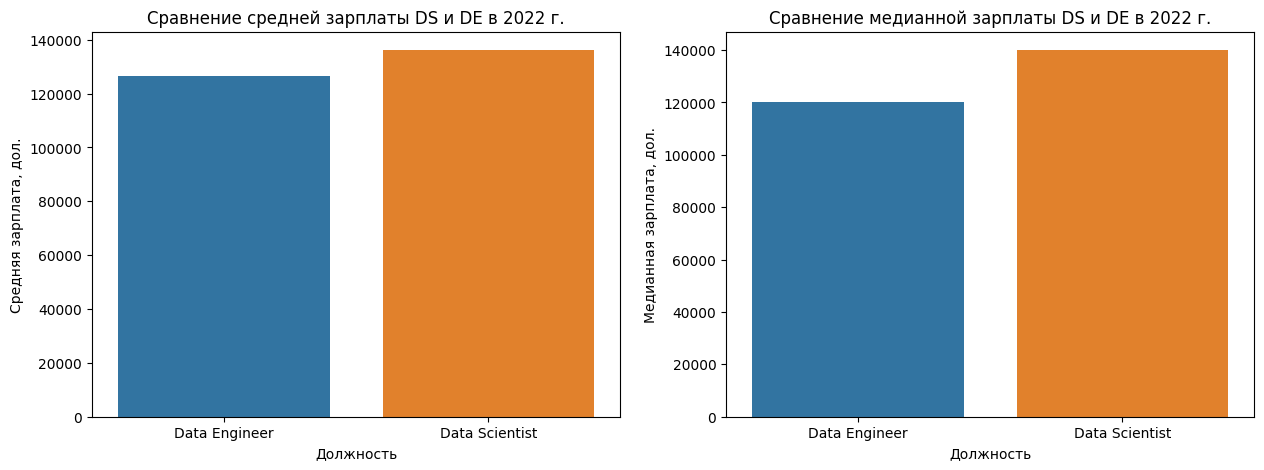

In [61]:
# Вначале сделаем выборку только по 2022 г.:
mask_2022 = ds_salaries.loc[ds_salaries['work_year'] == 2022]
# А теперь по нужным нам должностям:
mask_2022_DS_DE = mask_2022.loc[(ds_salaries['job_title'] == 'Data Scientist') | (ds_salaries['job_title'] == 'Data Engineer')]

# Сгруппируем данные по должностям, отобразив вначале среднюю, затем медианную зарплату:
mean_salary_DS_DE = mask_2022_DS_DE.groupby(
    by = ('job_title'),
    as_index = False
    )[['salary_in_usd']].mean()

median_salary_DS_DE = mask_2022_DS_DE.groupby(
    by = ('job_title'),
    as_index = False
    )[['salary_in_usd']].median()

# Построим столбчатые диаграммы для средних и для медиан:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(mean_salary_DS_DE, x='job_title', y='salary_in_usd', ax = axes[0])
axes[0].set(xlabel='Должность', ylabel='Средняя зарплата, дол.')
axes[0].set_title('Сравнение средней зарплаты DS и DE в 2022 г.')

sns.barplot(median_salary_DS_DE, x='job_title', y='salary_in_usd', ax = axes[1])
axes[1].set(xlabel='Должность', ylabel='Медианная зарплата, дол.')
axes[1].set_title('Сравнение медианной зарплаты DS и DE в 2022 г.')

plt.show()

Судя по графикам, зарплата сотрудников на должности "Дата-сайентист" выше, чем сотрудников на должности "Инженер данных".

Выясним, как соотносятся зарплаты в компаниях разных размеров. Выдвенем гипотезу по этому поводу на основе графиков.

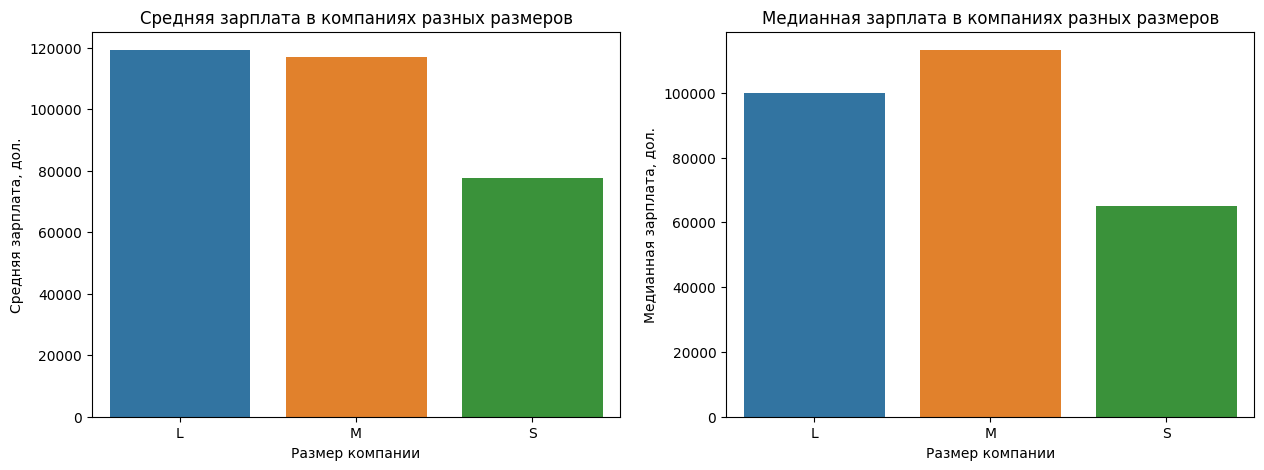

In [62]:
# Отсортируем данные по размерам компаний:
mask_S = ds_salaries.loc[ds_salaries['company_size'] == 'S']
mask_M = ds_salaries.loc[ds_salaries['company_size'] == 'M']
mask_L = ds_salaries.loc[ds_salaries['company_size'] == 'L']

# Группируем данные по размерам компаний. В качестве значений возьмём средние:
company_mean_salary = ds_salaries.groupby(
    by = ('company_size'),
    as_index = False
    )[['salary_in_usd']].mean()

# Проделаем то же самое для медианных зарплат:
company_median_salary = ds_salaries.groupby(
    by = ('company_size'),
    as_index = False
    )[['salary_in_usd']].median()

# Потроим столбчатые диаграммы для средних и для медиан:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(company_mean_salary, x='company_size', y='salary_in_usd', ax = axes[0])
axes[0].set(xlabel='Размер компании', ylabel='Средняя зарплата, дол.')
axes[0].set_title('Cредняя зарплата в компаниях разных размеров')

sns.barplot(company_median_salary, x='company_size', y='salary_in_usd', ax = axes[1])
axes[1].set(xlabel='Размер компании', ylabel='Медианная зарплата, дол.')
axes[1].set_title('Медианная зарплата в компаниях разных размеров')

plt.show()

На графиках видно, что зарплаты в средних и больших компаниях различаются незначительно (медианная зарплата в средних компаниях даже больше, что может говорить о единичных аномально высоких зарплатах в больших компаниях). А вот в маленьких компаниях зарплаты существенно ниже, чем в других.

Выясним, существует ли связь факта наличия должностей "Дата-сайентист" и "Инженер данных" от размера компании. Сделаем предположение.

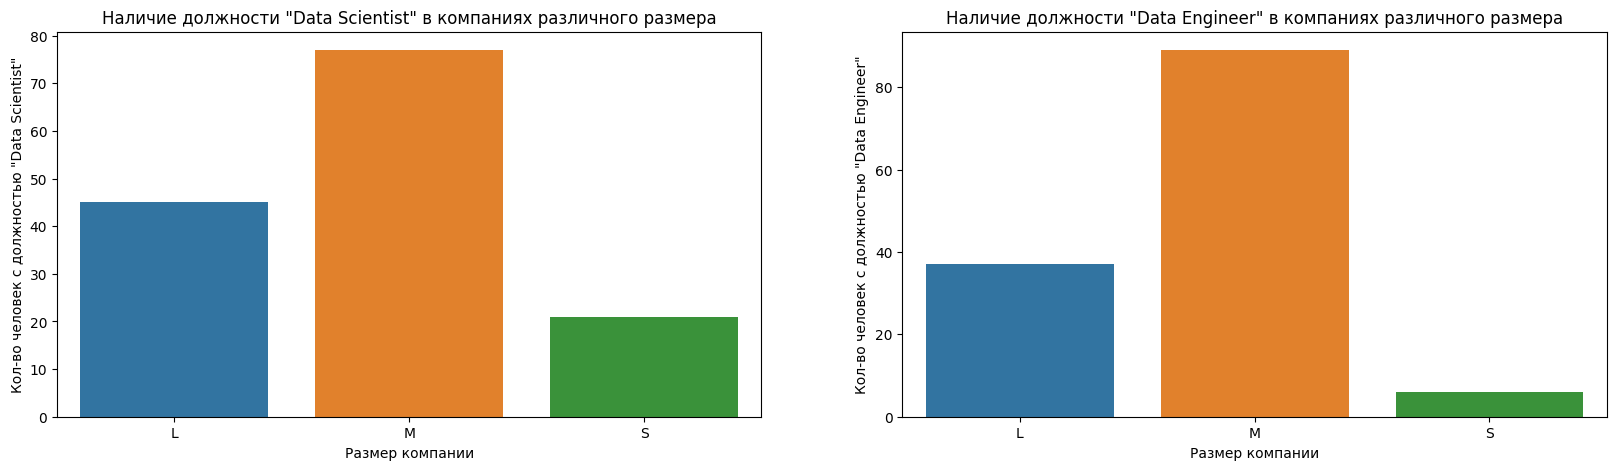

In [63]:
# Отсортируем данные вначале по должности Data Scientist, затем - Data Engineer.
# Создадим две временные таблицы по каждой из должностей:
mask_DS = ds_salaries.loc[ds_salaries['job_title'] == 'Data Scientist']
mask_DE = ds_salaries.loc[ds_salaries['job_title'] == 'Data Engineer']

# В каждой из таблиц посчитаем количество разных размеров компаний:
mask_DS_companies = mask_DS.groupby(
    by = ('company_size'),
    as_index = False
    )[['company_size']].value_counts()

mask_DE_companies = mask_DE.groupby(
    by = ('company_size'),
    as_index = False
    )[['company_size']].value_counts()

# По каждой из сгруппированных таблиц построим столбчатую диаграмму:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.barplot(mask_DS_companies, x='company_size', y='count', ax=axes[0])
axes[0].set(xlabel='Размер компании', ylabel='Кол-во человек с должностью "Data Scientist"')
axes[0].set_title('Наличие должности "Data Scientist" в компаниях различного размера')

sns.barplot(mask_DE_companies, x='company_size', y='count', ax=axes[1])
axes[1].set(xlabel='Размер компании', ylabel='Кол-во человек с должностью "Data Engineer"')
axes[1].set_title('Наличие должности "Data Engineer" в компаниях различного размера')

plt.show()

С одной стороны, мы видим, что указанные должности есть в компаниях разного размера. С другой, кодличество человек в должности "Инженер данных" в маленьких компаниях пренебрежительно мало. Я бы всё-таки склонился к версии, что связь между наличием нужных нам должностей и размером компании отсутствует.

Для того чтобы выяснить, какие признаки влияют на зарплату дата-сайентиста, а также для более точного статистического анализа необходимо выполнить кодировку признаков.

## Кодирование признаков

### Кодирование категориальных порядковых признаков

Согласно нашему анализу у нас 4 категориальных порядковых признака:

* work_year (3 значения),
* experience_level (4 значения),
* remote_ratio (3 значения),
* company_size (3 значения).

Определим количесвто записей каждого значения в данном типе признаков.

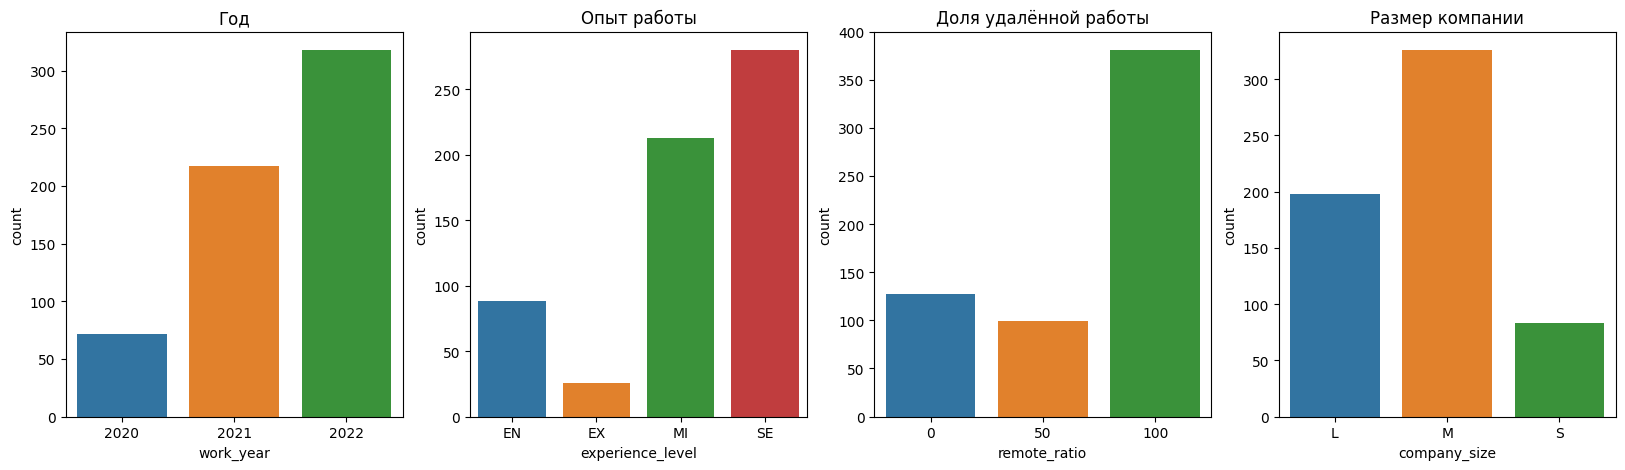

In [64]:
# Создадим 4 сводные таблицы с группировкой по каждому категориальному порядковому признаку:
ds_salaries_year = ds_salaries.groupby(
    by = ('work_year'),
    as_index = False
    )['work_year'].value_counts()

ds_salaries_experience = ds_salaries.groupby(
    by = ('experience_level'),
    as_index = False
    )['experience_level'].value_counts()

ds_salaries_remote = ds_salaries.groupby(
    by = ('remote_ratio'),
    as_index = False
    )['remote_ratio'].value_counts()

ds_salaries_company = ds_salaries.groupby(
    by = ('company_size'),
    as_index = False
    )['company_size'].value_counts()

# Визуализируем каждую из полученных сводных таблиц припомощи столбчатой диаграммы:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.barplot(ds_salaries_year, x='work_year', y='count', ax=axes[0])
axes[0].set_title('Год')

sns.barplot(ds_salaries_experience, x='experience_level', y='count', ax=axes[1])
axes[1].set_title('Опыт работы')

sns.barplot(ds_salaries_remote, x='remote_ratio', y='count', ax=axes[2])
axes[2].set_title('Доля удалённой работы')

sns.barplot(ds_salaries_company, x='company_size', y='count', ax=axes[3])
axes[3].set_title('Размер компании')

plt.show()

На наш взгляд, признаки work_year и remote_ratio не нуждаются в кодировке, поскольку их значения и так передают и разницу, и смысл этих признаков. А вот признаки experience_level и company_size мы закодируем так, чтобы меньшее число кода соответствовало меньшему размеру значений в признаках experience_level и company_size. Откодированные столбцы переименуем, а исходные удалим за ненадобностью.

In [65]:
# Кодируем признак experience_level:
ds_salaries['experience_lvl'] = ds_salaries['experience_level'].apply(lambda x: 1 if x == 'EN' else
                                                                      2 if x == 'MI' else
                                                                      3 if x == 'SE' else 4)
# Кодируем признак company_size:
ds_salaries['Company_Size'] = ds_salaries['company_size'].apply(lambda x: 1 if x == 'S' else
                                                                2 if x == 'M' else 3)
# Удаляем исходные столбцы, подвергшиеся кодировке:
ds_salaries = ds_salaries.drop(['experience_level', 'company_size'], axis=1)

ds_salaries

,work_year,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,experience_lvl,Company_Size
0,2020,FT,Data Scientist,79833,DE,0,DE,2,3
1,2020,FT,Machine Learning Scientist,260000,JP,0,JP,3,1
2,2020,FT,Big Data Engineer,109024,GB,50,GB,3,2
3,2020,FT,Product Data Analyst,20000,HN,0,HN,2,1
4,2020,FT,Machine Learning Engineer,150000,US,50,US,3,3
...,...,...,...,...,...,...,...,...,...
602,2022,FT,Data Engineer,154000,US,100,US,3,2
603,2022,FT,Data Engineer,126000,US,100,US,3,2
604,2022,FT,Data Analyst,129000,US,0,US,3,2
605,2022,FT,Data Analyst,150000,US,100,US,3,2


### Кодирование категориальных номинальных признаков

Согласно нашему анализу у нас 4 категориальных номинальных признака:

* employment_type (4 значения),
* job_title,
* employee_residence,
* company_location.

Определим характер распределения значений в данном типе признаков.

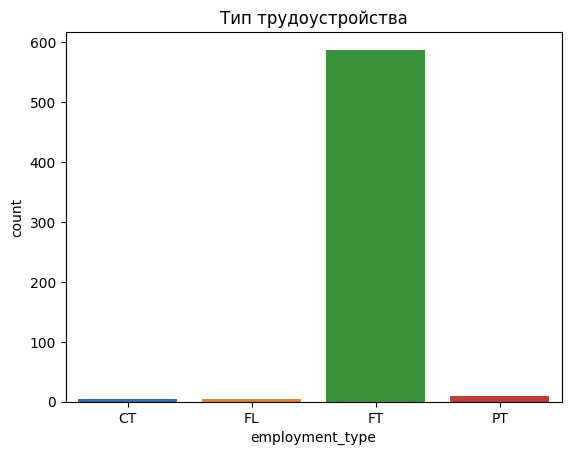

In [66]:
# Проанализируем признак employment_type.
# Создадим сводную таблицу с группировкой по данному признаку и визуализируем его:
ds_salaries_employment = ds_salaries.groupby(
    by = ('employment_type'),
    as_index = False
    )['employment_type'].value_counts()

ax = sns.barplot(ds_salaries_employment, x='employment_type', y='count').set_title('Тип трудоустройства')

plt.show()

Как видно из графика, доля значений "СТ", "FL" и "РТ" в общем наборе значений пренебрежительно мала. Это даёт нам возможность ввести новый признак "is_FT", который будет принимать значение"1", если сотрудник был занят полный рабочий день, и "0" в противном случае.

In [67]:
# Прменим к столбцу employment_type лямбда-функцию с заданным условием:
ds_salaries['is_FT'] = ds_salaries['employment_type'].apply(lambda x: 1 if x == 'FT' else 0)
# Удалим ненужный теперь столбец employment_type:
ds_salaries.drop('employment_type', axis=1, inplace=True)
ds_salaries

,work_year,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,experience_lvl,Company_Size,is_FT
0,2020,Data Scientist,79833,DE,0,DE,2,3,1
1,2020,Machine Learning Scientist,260000,JP,0,JP,3,1,1
2,2020,Big Data Engineer,109024,GB,50,GB,3,2,1
3,2020,Product Data Analyst,20000,HN,0,HN,2,1,1
4,2020,Machine Learning Engineer,150000,US,50,US,3,3,1
...,...,...,...,...,...,...,...,...,...
602,2022,Data Engineer,154000,US,100,US,3,2,1
603,2022,Data Engineer,126000,US,100,US,3,2,1
604,2022,Data Analyst,129000,US,0,US,3,2,1
605,2022,Data Analyst,150000,US,100,US,3,2,1


Следующий признак - job_title. Согласно поставленной перед нами задаче, из всего списка перечисленных в данном признаке значений нам придётся анализировать только два: Data Scientist и Data Engineer. Остальные значения никак в анализе участвовать не будут. В таком случае нам целесообразно оставить только эти два значения в признаке job_title, а все остальные обозначить, как "прочие". Кодировку произведём следующим образом: введём новый признак job. Значения в нём будут следующие: если сотрудник был в должности Data Scientist, то признак job принимает значение "1". Data Engineer - значение "2". Прочие должности - значение "0".

In [68]:
# Создадим новый столбец job и временно заполним его пропусками:
ds_salaries['job'] = np.nan

# Создадим функцию recognize_job, которая будет распознавать должность работника:
def recognize_job(item):
    if item == 'Data Scientist':
        result = 1
    elif item == 'Data Engineer':
        result = 2
    else:
        result = 0
    return result

# Применим функцию к столбцу job_title
our_job = ds_salaries['job_title'].apply(recognize_job)
# Заполним столбец job новыми значениями
ds_salaries['job'] = our_job
# Столбец job_title больше не нужен, удаляем его:
ds_salaries.drop('job_title', axis=1, inplace=True)
ds_salaries

,work_year,salary_in_usd,employee_residence,remote_ratio,company_location,experience_lvl,Company_Size,is_FT,job
0,2020,79833,DE,0,DE,2,3,1,1
1,2020,260000,JP,0,JP,3,1,1,0
2,2020,109024,GB,50,GB,3,2,1,0
3,2020,20000,HN,0,HN,2,1,1,0
4,2020,150000,US,50,US,3,3,1,0
...,...,...,...,...,...,...,...,...,...
602,2022,154000,US,100,US,3,2,1,2
603,2022,126000,US,100,US,3,2,1,2
604,2022,129000,US,0,US,3,2,1,0
605,2022,150000,US,100,US,3,2,1,0


Следующий признак - employee_residence. Проанализируем его.

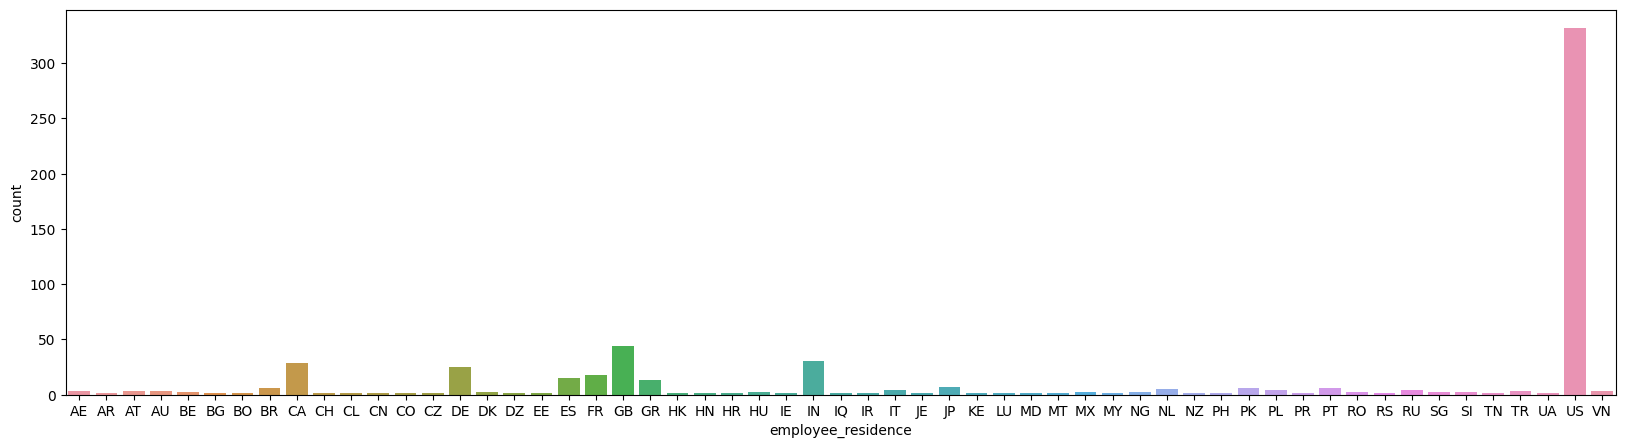

In [69]:
# Создадим сводную таблицу с группировкой по данному признаку и визуализируем его:
ds_salaries_residence = ds_salaries.groupby(
    by = ('employee_residence'),
    as_index = False
    )['employee_residence'].value_counts()

fig = plt.subplots(1, 1, figsize=(20, 5))
sns.barplot(ds_salaries_residence, x='employee_residence', y='count')
plt.show()

Как видно из визуализации, в подавляющем большинстве случаев данный признак принимает значения "US". Учитывая тот факт, что место работы человека редко не совпадает с его местом проживания, можно предположить, что распределение признака "company_location" - последнего из категориальных - будет иметь схожий характер. Проверим эту гипотезу.

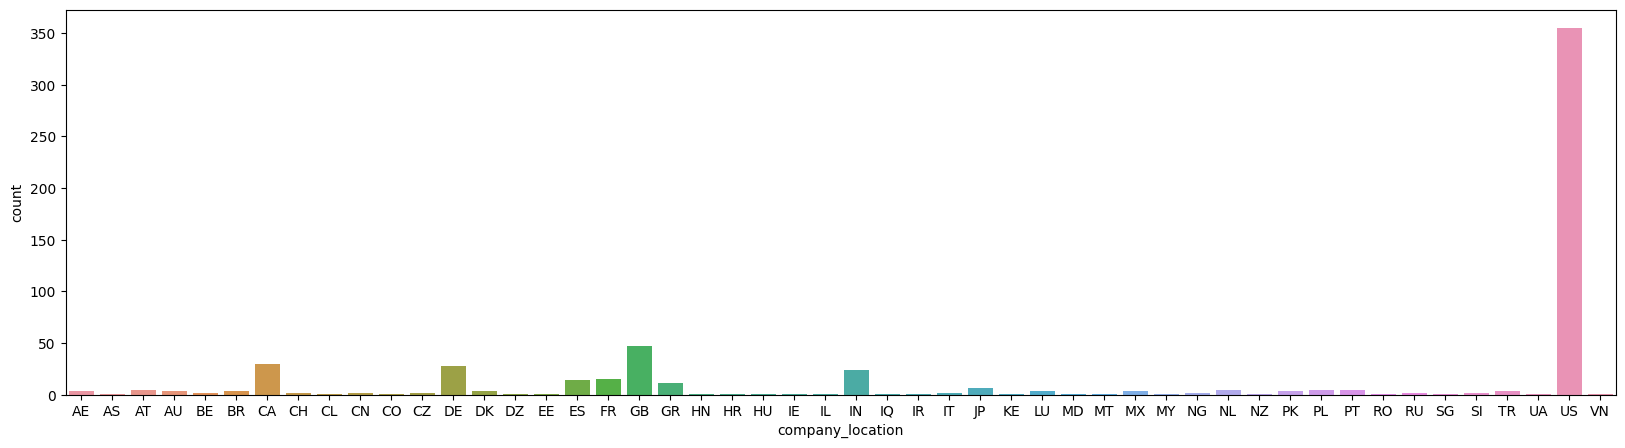

In [70]:
# Создадим сводную таблицу с группировкой по данному признаку и визуализируем его:
ds_salaries_location = ds_salaries.groupby(
    by = ('company_location'),
    as_index = False
    )['company_location'].value_counts()

fig = plt.subplots(1, 1, figsize=(20, 5))
sns.barplot(ds_salaries_location, x='company_location', y='count')
plt.show()

Наше предположение оказалось верным. Более того: доля значений "US" в признаке company_location даже больше, чем в признаке employee_residence. Таким образом, к обоим данным признакам мы можем применить один и тот же метод: создадим новый признак from_US и заполним его значениями "1", если employee_residence = "US". В противном случае from_US = 0. Признак company_location можно удалить из данных по двум причинам:
1. он мультиколлинеарен с признаком employee_residence,
2. зарплата сотрудника больше зависит именно от места проживания, чем от резиденции компании.

In [71]:
# Прменим к столбцу employee_residence лямбда-функцию с заданным условием:
ds_salaries['from_US'] = ds_salaries['employee_residence'].apply(lambda x: 1 if x == 'US' else 0)
# Удалим ненужные теперь столбцы employee_residence и company_location:
ds_salaries.drop(['employee_residence', 'company_location'], axis=1, inplace=True)
ds_salaries

,work_year,salary_in_usd,remote_ratio,experience_lvl,Company_Size,is_FT,job,from_US
0,2020,79833,0,2,3,1,1,0
1,2020,260000,0,3,1,1,0,0
2,2020,109024,50,3,2,1,0,0
3,2020,20000,0,2,1,1,0,0
4,2020,150000,50,3,3,1,0,1
...,...,...,...,...,...,...,...,...
602,2022,154000,100,3,2,1,2,1
603,2022,126000,100,3,2,1,2,1
604,2022,129000,0,3,2,1,0,1
605,2022,150000,100,3,2,1,0,1


Итак, наш набор данных принял окончательный вид и готов для анализа.

Прежде чем приступить к статистическому анализу данных, попробуеи ответить на первый вопрос нашего задания: какие факторы влияют на зарплату дата-сайентистов. Построим тепловую карту корреляций.

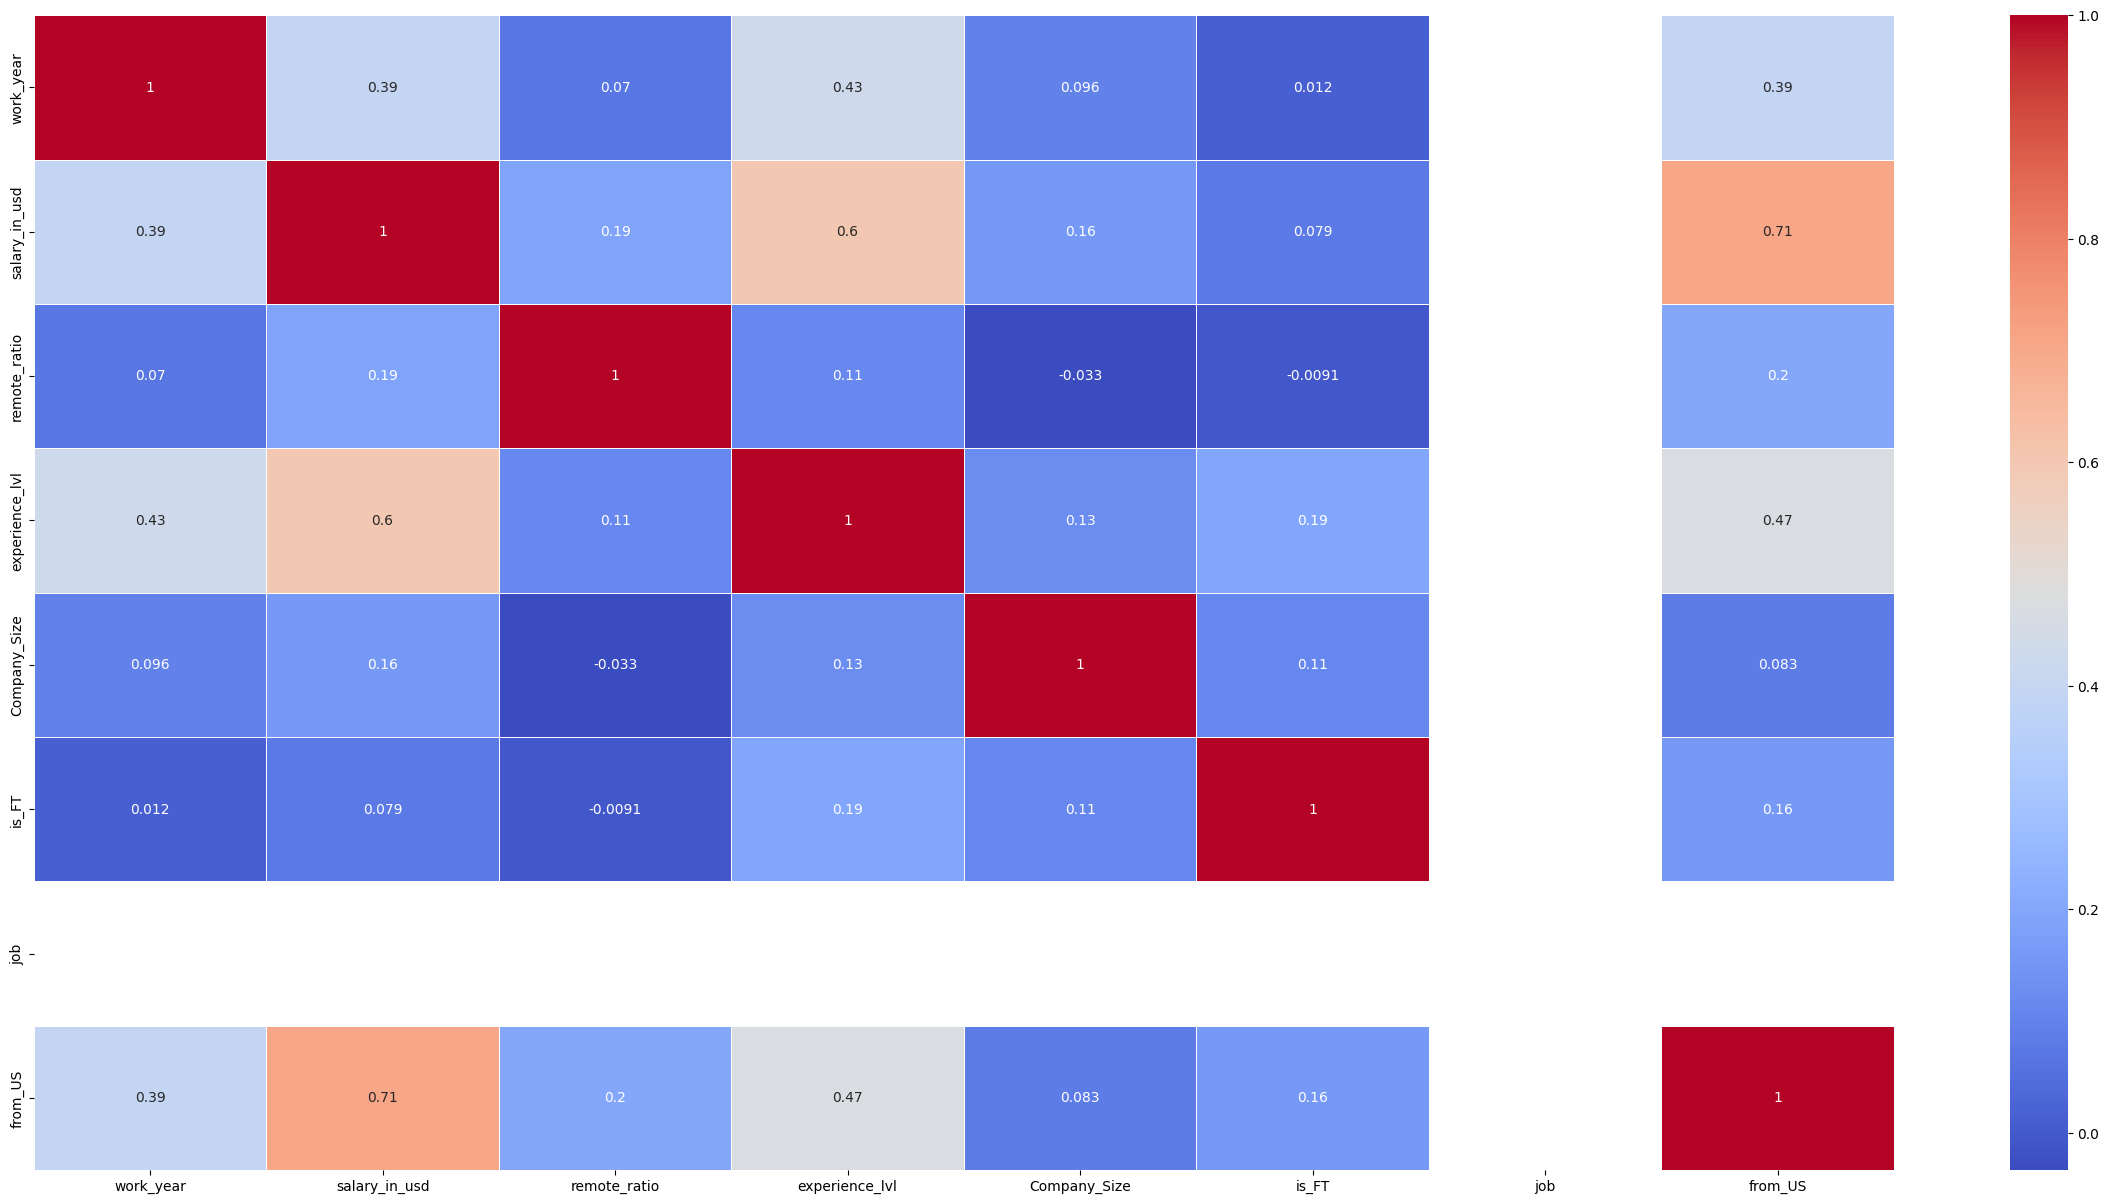

In [72]:
salaries_DS = ds_salaries.loc[ds_salaries['job'] == 1]

fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(salaries_DS.corr(), annot=True, linewidths=.5, ax=ax, cmap="coolwarm")
plt.show()

Как видно из тепловой карты сильная связь у признака salary_in_usd наблюдается лишь с признаком from_US. Отсюда мы сделаем предположение, что зарплата дата-сайентиста зависит от того, проживает ли он в США или нет. Кроме того, средняя связь у признака salary_in_usd наблюдается с признаком experience_lvl. Таким образом, путём точного статистического анализа нам требуется проверить два предположения:
1. зарплата дата-сайентиста сильно зависит от места проживания,
2. зарплата дата-сайентиста зависит от опыта работы.

## Статистический анализ данных

In [73]:
# задаём уровень значимости
alpha = 0.05 
print(f'Уровень значимости - {alpha}')

Уровень значимости - 0.05


Чтобы автоматизировать нашу работу, создадим функции для принятия решения о нормальности распределения данных и для принятия решения об отклонении нулевой гипотезы.

In [74]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

Вначале ответим на четыре вопроса, поставленные во втором задании.

### Есть ли ежегодный рост зарплаты у дата-сайентистов?

Поиск ответа на данный вопрос провдём в два этапа. На первом этапе, проверим, изменяется ли зарплата из года в год. Если да, проверим, есть ли рост.

#### Первый этап.

##### Построение гипотез.

$H_0: \mu_{2020} = \mu_{2021} = \mu_{2022}$ (нет ежегодного изменения зарплаты).

$H_1: \mu_{2020} \not= \mu_{2021} \not= \mu_{2022}$ (есть ежегодное изменение зарплаты).

Вначале при помощи теста Шапиро-Уилка проанализируем на нормальность распределения выборки по зарплате за каждый год.

In [75]:
# Выше мы уже отсортировали зарплату дата-сайентистов и сохранили результат в переменной salaries_DS.
# Используем её для анализа.
# Формируем выборки по зарплате за каждый год:
salary_20 = salaries_DS.loc[salaries_DS['work_year'] == 2020, 'salary_in_usd']
salary_21 = salaries_DS.loc[salaries_DS['work_year'] == 2021, 'salary_in_usd']
salary_22 = salaries_DS.loc[salaries_DS['work_year'] == 2022, 'salary_in_usd']

# проводим тест Шапиро-Уилка
print("Для 2020 года: ")
result = stats.shapiro(salary_20)
decision_normality(result[1])

print("Для 2021 года: ")
result = stats.shapiro(salary_21)
decision_normality(result[1])

print("Для 2022 года: ")
result = stats.shapiro(salary_22)
decision_normality(result[1])

Для 2020 года: 
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для 2021 года: 
p-value = 0.125
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для 2022 года: 
p-value = 0.327
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


Как видно из анализа, лишь данные за 2020 год распределены ненормально, а за 2021 и 2022 года - норомально. Этим и объяснялись наши сложности с невозможностью дать однозначный ответ о нормальности распределения на этапе предварительного анализа данных. Тем не менее, поскольку одна из выборок распределена ненормально, мы не можем применить параметрические тесты для ответа на вопрос, есть ли ежегодный рост зарплаты у дата-сайентистов.

##### Выбор статистического теста.

Тип данных - количественный.

Количество групп для анализа - более 2.

Зависимость данных - нет.

Нормальность распределения данных - нет.

**Выбираем тест Краскела-Уоллиса**

In [76]:
# Проводим тест:
_, p = stats.kruskal(salary_20, salary_21, salary_22)
# Обрабатываем результат теста при помощи функции decision_hypothesis
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Вывод.

$p < \alpha$. Отвергаем нулевую гипотезу. Ежегодное изменение зарплаты дата-сайентистов действительно присутствует.

#### Второй этап.

Проверим, есть ли ежегодный рост зарплаты. Для этого сравним сначала данные за 2020 и 2021 г., затем - за 2021 и 2022 г.

##### Сравнение зарплат за 2020 г. и 2021 г.

##### *Построение гипотез*.

$H_0: \mu_{2020} >= \mu_{2021}$ (рост зарплаты Data Scientist в 2020 году по отношению к зарплате в 2021 отсутствует).

$H_1: \mu_{2020} < \mu_{2021}$ (рост зарплаты Data Scientist в 2020 году по отношению к зарплате в 2021 присутствует).

##### *Сбор данных для проверки гипотезы*

Все выборки сделаны. Распределение данных проанализировано. Поскольку в 2020 г. распределение данных было ненормальным, мы не можем применить параметрический тест.

##### *Выбор статистического теста*.

Тип данных - количественный.

Количество групп для анализа - 2.

Зависимость данных - нет.

Нормальность распределения данных - нет.

**Выбираем U-критерий Манна-Уитни**

In [77]:
# Проводим тест:
_, p = stats.mannwhitneyu(salary_20, salary_21, alternative = 'less')
# Обрабатываем результат:
decision_hypothesis(p)

p-value = 0.685
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


##### *Вывод*.

У нас нет оснований считать, что в 2021 г. зарплата дата-сайентистов выросла по сравнению с 2021 г.

##### Сравнение зарплат за 2021 г. и 2022 г.

##### *Построение гипотез*.

$H_0: \mu_{2021} >= \mu_{2022}$ (рост зарплаты Data Scientist в 2021 году по отношению к зарплате в 2022 отсутствует).

$H_1: \mu_{2021} < \mu_{2022}$ (рост зарплаты Data Scientist в 2021 году по отношению к зарплате в 2022 присутствует).

##### *Сбор данных для проверки гипотезы*

Все выборки сделаны. Распределение данных нормальное.

##### *Выбор статистического теста*.

Тип данных - количественный.

Количество групп для анализа - 2.

Зависимость данных - нет.

Нормальность распределения данных - да.

**Выбираем двухвыборочный t-критерий**

In [78]:
# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(salary_21, salary_22)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

Тест на равенство дисперсий
p-value = 0.445
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.


In [79]:
# Проводим тест:
_, p = stats.ttest_ind(salary_21, salary_22, alternative='less', equal_var=True)
# Обрабатываем результат
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


#### Вывод.

Наша предварительная гипотеза о том, что в 2021 г. наблюдалось небольшое снижение средней зарплаты, а в 2022 г. её резкий рост подтвердилась. Окончательный ответ: нет оснований считать, что в 2021 г. произошёл рост зарплаты у дата-саёентистов, зато в 2022 г. зарплата действительно выросла.

### Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

Поскольку ответ на вопрос, поставленный в таком виде, методами статистического анализа дать нельзя, то я возьму на себя смелость переформулировать его: различны ли зарплаты дата-сайентистов и инженеров данных в 2022 году?

#### Построение гипотез.

$H_0: \mu_{DS} = \mu_{DE}$ (зарплаты Data Scientist и Data Engineer в 2022 году равны).

$H_1: \mu_{DS} \not= \mu_{DE}$ (зарплаты Data Scientist и Data Engineer в 2022 году различны).

##### Сбор данных для проверки гипотезы.

In [80]:
# Сформируем выборку по зарплатам Data Engineer в 2022 году:
# Из общей таблицы отфильтровываем данные только по Data Engineer:
salaries_DE = ds_salaries.loc[ds_salaries['job'] == 2]
# Из получившейся таблицы берём зарплаты по 2022 г.:
salaries_DE22 = salaries_DE.loc[salaries_DE['work_year'] == 2022, 'salary_in_usd']
# Аналогичные данные по Data Scientist у нас сохранены в переменной salary_22.

# Над обеими выборками проведём тест Шапиро-Уилка:
print("Для Data Scientist: ")
result = stats.shapiro(salary_22)
decision_normality(result[1])

print("Для Data Engineer: ")
result = stats.shapiro(salaries_DE22)
decision_normality(result[1])

Для Data Scientist: 
p-value = 0.327
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для Data Engineer: 
p-value = 0.010
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


В одной из выборок распределение данных не подчиняется нормальному закону, поэтому мы не имеем права применить параметрический тест.

##### Выбор статистического теста.

Тип данных - количественный.

Количество групп для анализа - 2.

Зависимость данных - нет.

Нормальность распределения данных - нет.

**Выбираем U-критерий Манна-Уитни**

In [81]:
# Проводим тест:
_, p = stats.mannwhitneyu(salary_22, salaries_DE22)
# Обрабатываем результат
decision_hypothesis(p)

p-value = 0.155
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


##### Вывод.

$p > \alpha$. Принимаем нулевую гипотезу: у нас нет оснований считать, что зарплаты дата-сайентистов и инженеров данных в 2022 г. различались. Наш предварительный прогноз, основанный на графиках, не подтвердился.

### Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

Опять переформулируем вопрос: выясним, различаются ли зарплаты дата-сайентистов в компаниях различных размеров.

#### Построение гипотез.

$H_0: \mu_{S} = \mu_{M} = \mu_{L}$ (зарплаты в компаниях разных размеров равны).

$H_1: \mu_{S} \not= \mu_{M} \not= \mu_{L}$ (зарплаты в компаниях разных размеров не равны).

#### Сбор данных для проверки гипотезы.

In [82]:
# Отсортируем данные по размерам компаний:
salaries_1 = ds_salaries.loc[ds_salaries['Company_Size'] == 1]
salaries_2 = ds_salaries.loc[ds_salaries['Company_Size'] == 2]
salaries_3 = ds_salaries.loc[ds_salaries['Company_Size'] == 3]

# Теперь в каждой из полученных выборок выберем зарплаты дата-сайентистов
salaries_1_DS = salaries_1.loc[salaries_1['job'] == 1, 'salary_in_usd']
salaries_2_DS = salaries_2.loc[salaries_2['job'] == 1, 'salary_in_usd']
salaries_3_DS = salaries_3.loc[salaries_3['job'] == 1, 'salary_in_usd']

# Применим тест Шапиро-Уилка ко всем трём выборкам:
print("Для компаний 1 размера: ")
result = stats.shapiro(salaries_1_DS)
decision_normality(result[1])

print("Для компаний 2 размера: ")
result = stats.shapiro(salaries_2_DS)
decision_normality(result[1])

print("Для компаний 3 размера: ")
result = stats.shapiro(salaries_3_DS)
decision_normality(result[1])

Для компаний 1 размера: 
p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для компаний 2 размера: 
p-value = 0.639
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для компаний 3 размера: 
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


В одной из выборок распределение данных не является нормальным. Мы не можем применить параметрический тест.

#### Выбор статистического теста.

Тип данных - количественный.

Количество групп для анализа - более 2.

Зависимость данных - нет.

Нормальность распределения данных - нет.

**Выбираем тест Краскела-Уоллиса**

In [83]:
# проводим тест
_, p = stats.kruskal(salaries_1_DS, salaries_2_DS, salaries_3_DS)
# Обрабатываем результат
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


#### Вывод.

Альтернативная гипотеза подтвердилась. Зарплаты дата-сайентистов в компаниях разных размеров различаются. Это согласуется с нашим предварительным выводом, где мы выяснили, что зарплата дата-сайентистов в маленьких компаниях существенно ниже, чем в остальных. А вот в средних и больших разница в зарплате не так высока. Более того, медианная зарплата в средних даже выше, чем в больших. Это натолкнуло нас на мысль, что в больших компаниях есть аномально высокие зарплаты (выбросы), что подтвердилось тестом Шапиро-Уилка.

### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

#### Построение гипотез.

$H_0$: Связь отсутствует.

$H_1$: Связь присутствует.

#### Сбор данных для проверки гипотезы.

Для проверки данной гипотезы введём в нашу таблицу новый признак: наличие-отсутствие должностей Data Scientist и Data Engineer. Там, где данные должности присутствуют, признак будет принмать значение "1", где отсутствуют - значение "0".

In [84]:
# Введём новый признак "DS/DE":
ds_salaries['DS/DE'] = ds_salaries['job'].apply(lambda x: 0 if x == 0 else 1)
ds_salaries

,work_year,salary_in_usd,remote_ratio,experience_lvl,Company_Size,is_FT,job,from_US,DS/DE
0,2020,79833,0,2,3,1,1,0,1
1,2020,260000,0,3,1,1,0,0,0
2,2020,109024,50,3,2,1,0,0,0
3,2020,20000,0,2,1,1,0,0,0
4,2020,150000,50,3,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...
602,2022,154000,100,3,2,1,2,1,1
603,2022,126000,100,3,2,1,2,1,1
604,2022,129000,0,3,2,1,0,1,0
605,2022,150000,100,3,2,1,0,1,0


Мы получили новый категориальный признак.

#### Выбор статистического теста.

Тип данных - категориальный.

Зависимость данных - нет.

**Выбираем критерий хи-квадрат**

In [85]:
# вычисляем таблицу сопряжённости
table = pd.crosstab(ds_salaries['DS/DE'], ds_salaries['Company_Size'])

# проводим тест
_, p, _, _ = stats.chi2_contingency(table)

# Обрабатываем результат
decision_hypothesis(p)

p-value = 0.004
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


#### Вывод.

Альтернативная гипотеза подтвердилась. Связь между наличием должностей Data Scientist и Data Engineer и размером компании действительно существует. Таким образом, наше первоначальное предположение, основанное на визуализации, не подтвердилось.

### Какие факторы влияют на зарплату специалиста Data Scientist?

Проверим методом статистического анализа две наши гипотезы, выдвинутые на этапе визкализации данных.

#### Зарплата дата-сайентиста сильно зависит от места проживания.

##### Построение гипотез.

$H_0$: Связь отсутствует.

$H_1$: Связь присутствует.

##### Сбор данных для проверки гипотезы.

Для проведения исследования категоризуем признак salary_in_usd. Введём новый признак, который будет указывать на уровень зарплаты. За шаг возьмём величину в 30 тыс. дол.

In [86]:
# Вводим новый признак, показывающий уровень заработной платы.
ds_salaries['Salary_lvl'] = ds_salaries['salary_in_usd'].apply(lambda x: 0 if x < 30000 else
                                                               1 if x < 60000 else
                                                               2 if x < 90000 else
                                                               3 if x < 120000 else
                                                               4 if x < 150000 else
                                                               5 if x < 180000 else
                                                               6 if x < 210000 else
                                                               7 if x < 240000 else
                                                               8 if x < 270000 else 9)
ds_salaries

,work_year,salary_in_usd,remote_ratio,experience_lvl,Company_Size,is_FT,job,from_US,DS/DE,Salary_lvl
0,2020,79833,0,2,3,1,1,0,1,2
1,2020,260000,0,3,1,1,0,0,0,8
2,2020,109024,50,3,2,1,0,0,0,3
3,2020,20000,0,2,1,1,0,0,0,0
4,2020,150000,50,3,3,1,0,1,0,5
...,...,...,...,...,...,...,...,...,...,...
602,2022,154000,100,3,2,1,2,1,1,5
603,2022,126000,100,3,2,1,2,1,1,4
604,2022,129000,0,3,2,1,0,1,0,4
605,2022,150000,100,3,2,1,0,1,0,5


Итак, мы получили 10 уровней зарплаты в зависимости от её величины. Теперь из всего набора данных выделим только дата-сайентистов.

In [87]:
salaries_DS = ds_salaries.loc[ds_salaries['job'] == 1]
salaries_DS

,work_year,salary_in_usd,remote_ratio,experience_lvl,Company_Size,is_FT,job,from_US,DS/DE,Salary_lvl
0,2020,79833,0,2,3,1,1,0,1,2
7,2020,35735,50,2,3,1,1,0,1,1
10,2020,51321,0,1,1,1,1,0,1,1
11,2020,40481,0,2,3,1,1,0,1,1
12,2020,39916,0,1,2,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
592,2022,230000,100,3,2,1,1,1,1,7
593,2022,150000,100,3,2,1,1,1,1,5
596,2022,210000,100,3,2,1,1,1,1,7
598,2022,160000,100,2,2,1,1,1,1,5


Теперь мы можем провести необходимые статистические расчёты.

##### Выбор статистического теста.

Тип данных - категориальный.

Зависимость данных - нет.

**Выбираем критерий хи-квадрат**

In [88]:
# вычисляем таблицу сопряжённости
table = pd.crosstab(salaries_DS['Salary_lvl'], salaries_DS['from_US'])

# проводим тест
_, p, _, _ = stats.chi2_contingency(table)

# Обрабатываем результат
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Вывод.

Наша гипотеза подтвердилась. Связь между уровнем заработной платы дата-сайентистов и фактом проживания в США подтвердилась. Напомню, что в ходе визуализации данных эта связь была нами интерпретировна как сильная, даже близкая к мультиколлинеарной.

#### Зарплата дата-сайентиста зависит от опыта работы.

##### Построение гипотез.

$H_0$: Связь отсутствует.

$H_1$: Связь присутствует.

##### Сбор данных для проверки гипотезы.

Все необходимые данные уже готовы к анализу.

##### Выбор статистического теста.

Тип данных - категориальный.

Зависимость данных - нет.

**Выбираем критерий хи-квадрат**

In [89]:
# вычисляем таблицу сопряжённости
table = pd.crosstab(salaries_DS['Salary_lvl'], salaries_DS['experience_lvl'])

# проводим тест
_, p, _, _ = stats.chi2_contingency(table)

# Обрабатываем результат
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Вывод.

Вторая наша гипотеза тоже нашла своё подтверждение. Зарплата дата-сайентиста действительно зависит от опыта работы. На этапе визуализации данных данная связь была оценена нами как средняя.

## Общие выводы по проекту.

Цель проекта достигнута: были получены ответы на все вопросы, поставленные перед нами HR-агенством.

1. На зарплату специалиста Data Scientist оказывает сильное влияние факт его проживания в США: у специалистов из этой страны зарплата выше, чем у всех остальных. Также средний уровень влияния оказывает опыт работы: с увеличением опыта растёт зарплата.
2. * а. Уровень зарплаты дата-сайентистов за представленный период действительно вырос, но не факт, что такой рост происходил именно ежегодно. Наблюдается резкий скачок в уровне зарплаты в 2022 г.
   * б. Нет оснований полагать, что в 2022 г. зарплата дата-сайентистов была выше, чем у инженеров данных.
   * в. Уровень заработной платы дата-сайентистов действительно разный в компаниях различного размера. Причём, в маленьких компаниях зарплата значительно ниже, чем во всех остальных.
   * г. Действительно, факт наличия должностей Data Scientist и Data Engineer связан с размером компании. В маленьких компаниях таких должностей очень мало.